## Linear Regression in keras
*****************************

In [4]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [5]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]
df = pd.read_csv('powerproduction.csv')

df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [9]:
x = df['speed']
y = df['power']
cdf = df[['speed','power']]

cdf.head(9)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048


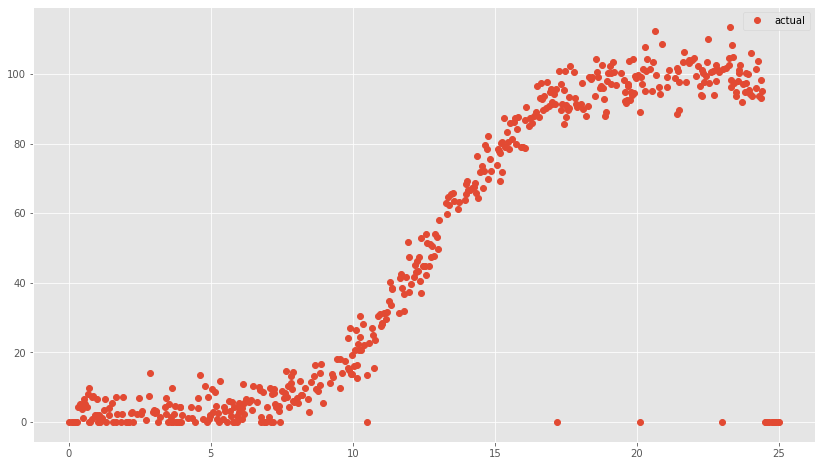

In [7]:
# Let's plot our predictions of the x values we trained on
plt.plot(x, y,'o', label='actual')

plt.legend();

In [2]:
# Let's set f to a polynomial instead.
f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0

poly = pd.DataFrame()
poly['x'] = np.linspace(-0.0, 25.0, 120)
poly['y'] = poly['x'].apply(f)
# Change the activation function.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')
# Fit the data.
model.fit(poly['x'], poly['y'], epochs=500, batch_size=10)

NameError: name 'pd' is not defined

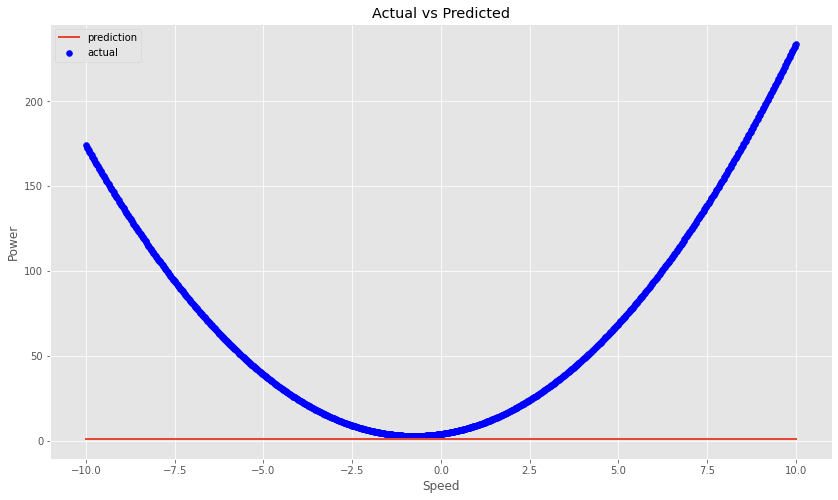

In [25]:


plt.title('Actual vs Predicted')
plt.scatter(poly['x'], poly['y'],color="blue",label='actual')
plt.plot(poly['x'], model.predict(poly['x']), linewidth=2,label='prediction')
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()


In [21]:
# Without training, let's have a look at the output.
sigdata = pd.DataFrame()
sigdata['x'] = np.linspace(-10.0, 10.0, 1000)
sigdata['y'] = model.predict(sigdata['x'])

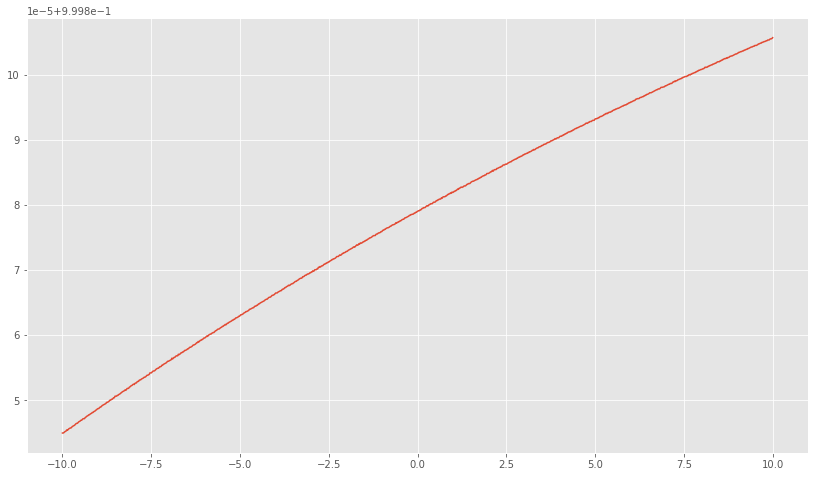

In [22]:
# Let's see what that looks like.
plt.plot(sigdata['x'], sigdata['y']);

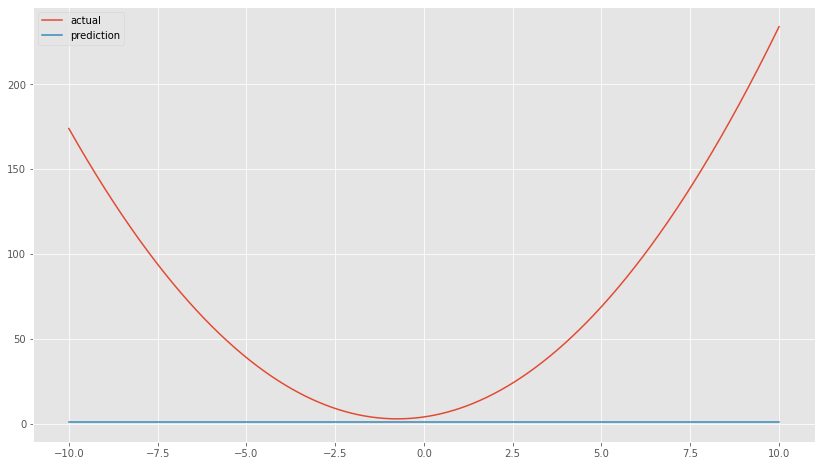

In [26]:
# Now let's see.
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();

In [ ]:
# Let's plot our predictions of the x values we trained on
plt.plot(x, y, label='actual')
plt.plot(x, train['x'],'r', label='prediction')
plt.legend();

In [ ]:
# Evaluate the neural network on the test data.
model.evaluate(test['x'], test['y'])
# Re-build our model.

# Let's set f to a polynomial instead.
f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0

poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f)
# Have a look.
plt.plot(poly['x'], poly['y']);
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [ ]:
# Fit the data.
model.fit(poly['x'], poly['y'], epochs=500)

In [ ]:

# Now let's see.
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();

Automatically created module for IPython interactive environment


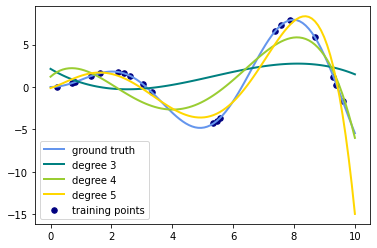

In [1]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()